In [5]:
from mitosheet.public.v3 import *; register_analysis("id-sztmdxeqmm");
import pandas as pd

# Imported Sheet1 from C:\Users\DEll\Downloads\final_dataset.xlsx
sheet_df_dictonary = pd.read_excel(r'C:\\Users\\DEll\\Downloads\\final_dataset.xlsx', engine='openpyxl', sheet_name=[
    'Sheet1'
], skiprows=0)
Sheet1 = sheet_df_dictonary['Sheet1']


In [6]:
df.head(5)

,year,country,iso,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,...,eq_dp,eq_capgain_interp,eq_tr_interp,eq_dp_interp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr,Recessions
0,1870,UK,GBR,112,31400.0,3190.434013,13.815308,14.81,1.056202,0.074343,...,NaN,NaN,NaN,NaN,0.0324,NaN,NaN,NaN,0.027462,0
1,1871,UK,GBR,112,31685.0,3331.875020,14.210668,15.24,1.141664,0.078265,...,0.051408,NaN,NaN,NaN,0.0323,0.0617,NaN,NaN,0.035722,0
2,1872,UK,GBR,112,31874.0,3319.165401,14.156267,15.35,1.211361,0.087918,...,0.029338,NaN,NaN,NaN,0.0324,0.0303,NaN,NaN,0.027608,0
3,1873,UK,GBR,112,32177.0,3364.697641,14.474454,15.55,1.270045,0.088830,...,0.029521,NaN,NaN,NaN,0.0324,0.0301,NaN,NaN,0.044428,1
4,1874,UK,GBR,112,32501.0,3386.444109,14.418424,15.93,1.262897,0.100768,...,0.044231,NaN,NaN,NaN,0.0324,0.0437,NaN,NaN,0.031316,1


In [7]:
import pandas as pd
import numpy as np
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df.duplicated().sum()


0

In [9]:
df.columns


Index(['year', 'country', 'iso', 'ifs', 'pop', 'rgdpmad', 'rgdpbarro',
       'rconsbarro', 'gdp', 'iy', 'cpi', 'ca', 'imports', 'exports', 'narrowm',
       'money', 'stir', 'ltrate', 'hpnom', 'unemp', 'wage', 'debtgdp',
       'revenue', 'expenditure', 'xrusd', 'tloans', 'tmort', 'thh', 'tbus',
       'bdebt', 'lev', 'ltd', 'noncore', 'crisisJST', 'crisisJST_old', 'peg',
       'peg_strict', 'peg_type', 'peg_base', 'JSTtrilemmaIV', 'eq_tr',
       'housing_tr', 'bond_tr', 'bill_rate', 'rent_ipolated',
       'housing_capgain_ipolated', 'housing_capgain', 'housing_rent_rtn',
       'housing_rent_yd', 'eq_capgain', 'eq_dp', 'eq_capgain_interp',
       'eq_tr_interp', 'eq_dp_interp', 'bond_rate', 'eq_div_rtn', 'capital_tr',
       'risky_tr', 'safe_tr', 'Recessions'],
      dtype='object')

In [10]:
columns_with_all_null = df.columns[df.isnull().all()]

print("Columns with complete null values:")
print(columns_with_all_null)

Columns with complete null values:
Index(['rent_ipolated', 'housing_capgain_ipolated', 'eq_capgain_interp',
       'eq_tr_interp', 'eq_dp_interp'],
      dtype='object')


In [12]:
df_clean =df.drop(['rent_ipolated', 'housing_capgain_ipolated', 'eq_capgain_interp',
       'eq_tr_interp', 'eq_dp_interp'], axis=1)
df_clean

,year,country,iso,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,...,housing_rent_rtn,housing_rent_yd,eq_capgain,eq_dp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr,Recessions
0,1870,UK,GBR,112,31400.000000,3190.434013,13.815308,14.810000,1.056202,0.074343,...,NaN,NaN,NaN,NaN,0.032400,NaN,NaN,NaN,0.027462,0
1,1871,UK,GBR,112,31685.000000,3331.875020,14.210668,15.240000,1.141664,0.078265,...,NaN,NaN,0.2002,0.051408,0.032300,0.0617,NaN,NaN,0.035722,0
2,1872,UK,GBR,112,31874.000000,3319.165401,14.156267,15.350000,1.211361,0.087918,...,NaN,NaN,0.0328,0.029338,0.032400,0.0303,NaN,NaN,0.027608,0
3,1873,UK,GBR,112,32177.000000,3364.697641,14.474454,15.550000,1.270045,0.088830,...,NaN,NaN,0.0196,0.029521,0.032400,0.0301,NaN,NaN,0.044428,1
4,1874,UK,GBR,112,32501.000000,3386.444109,14.418424,15.930000,1.262897,0.100768,...,NaN,NaN,-0.0120,0.044231,0.032400,0.0437,NaN,NaN,0.031316,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2016,UK,GBR,112,64389.567936,25649.813255,106.189973,106.596660,2016.638000,0.176127,...,0.025303,0.023653,0.1084,0.041231,0.013052,0.0457,0.102151,0.130764,0.036645,0
147,2017,UK,GBR,112,64774.053535,25941.298227,107.306512,107.075470,2097.143000,0.180189,...,0.023948,0.022907,0.0969,0.039931,0.012358,0.0438,0.081723,0.110188,0.020781,0
148,2018,UK,GBR,112,65162.462457,26109.672727,107.994268,107.947319,2174.380000,0.177735,...,0.023089,0.022370,-0.1321,0.042171,0.014607,0.0366,-0.010501,-0.023516,0.014664,0
149,2019,UK,GBR,112,65516.542307,26341.025966,108.858827,108.520995,2255.283000,0.177188,...,0.022625,0.022399,0.1291,0.048446,0.009358,0.0547,0.088431,0.115673,0.032150,0


In [13]:
df_clean.tail(5)

,year,country,iso,ifs,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,...,housing_rent_rtn,housing_rent_yd,eq_capgain,eq_dp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr,Recessions
146,2016,UK,GBR,112,64389.567936,25649.813255,106.189973,106.596660,2016.638,0.176127,...,0.025303,0.023653,0.1084,0.041231,0.013052,0.0457,0.102151,0.130764,0.036645,0
147,2017,UK,GBR,112,64774.053535,25941.298227,107.306512,107.075470,2097.143,0.180189,...,0.023948,0.022907,0.0969,0.039931,0.012358,0.0438,0.081723,0.110188,0.020781,0
148,2018,UK,GBR,112,65162.462457,26109.672727,107.994268,107.947319,2174.380,0.177735,...,0.023089,0.022370,-0.1321,0.042171,0.014607,0.0366,-0.010501,-0.023516,0.014664,0
149,2019,UK,GBR,112,65516.542307,26341.025966,108.858827,108.520995,2255.283,0.177188,...,0.022625,0.022399,0.1291,0.048446,0.009358,0.0547,0.088431,0.115673,0.032150,0
150,2020,UK,GBR,112,65795.098201,23646.774126,97.647619,96.121477,2152.646,0.171062,...,0.022802,0.022173,-0.1214,0.030731,0.003744,0.0270,NaN,NaN,0.028959,1


In [14]:
columns_to_drop = ["country","ifs", "iso"]
df_clean = df_clean.drop(columns=columns_to_drop)

In [15]:
df_clean.head(5)

,year,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,cpi,ca,imports,...,housing_rent_rtn,housing_rent_yd,eq_capgain,eq_dp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr,Recessions
0,1870,31400.0,3190.434013,13.815308,14.81,1.056202,0.074343,2.197213,0.0553,0.279,...,NaN,NaN,NaN,NaN,0.0324,NaN,NaN,NaN,0.027462,0
1,1871,31685.0,3331.875020,14.210668,15.24,1.141664,0.078265,2.227974,0.0765,0.304,...,NaN,NaN,0.2002,0.051408,0.0323,0.0617,NaN,NaN,0.035722,0
2,1872,31874.0,3319.165401,14.156267,15.35,1.211361,0.087918,2.332689,0.0973,0.326,...,NaN,NaN,0.0328,0.029338,0.0324,0.0303,NaN,NaN,0.027608,0
3,1873,32177.0,3364.697641,14.474454,15.55,1.270045,0.088830,2.405002,0.0857,0.342,...,NaN,NaN,0.0196,0.029521,0.0324,0.0301,NaN,NaN,0.044428,1
4,1874,32501.0,3386.444109,14.418424,15.93,1.262897,0.100768,2.325637,0.0776,0.341,...,NaN,NaN,-0.0120,0.044231,0.0324,0.0437,NaN,NaN,0.031316,1


In [16]:
df_clean.describe()

,year,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,cpi,ca,imports,...,housing_rent_rtn,housing_rent_yd,eq_capgain,eq_dp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr,Recessions
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,118.000000,120.000000,150.000000,150.000000,151.000000,150.000000,117.000000,117.000000,151.000000,151.000000
mean,1945.000000,49288.263647,9948.778504,42.764528,40.678845,327.739237,0.131684,40.669917,-8.495749,66.667208,...,0.038734,0.036957,0.056403,0.041699,0.049325,0.043579,0.084712,0.101736,0.046829,0.225166
std,43.734045,8964.347220,7026.488858,29.463557,28.510590,597.865464,0.060723,58.842835,21.644795,126.385486,...,0.009044,0.008727,0.185477,0.011965,0.030132,0.013226,0.081999,0.102779,0.058210,0.419081
min,1870.000000,31400.000000,3190.434013,13.815308,14.810000,1.056202,0.029554,1.984892,-108.392650,0.279000,...,0.022625,0.022173,-0.554120,0.020000,0.003744,0.020248,-0.064822,-0.138485,-0.075493,0.000000
25%,1907.500000,43904.500000,4536.597255,19.490423,20.145000,2.027187,0.079822,2.278028,-1.255500,0.574500,...,0.032545,0.031237,-0.033900,0.033053,0.029400,0.035625,0.022446,0.034671,0.015900,0.000000
50%,1945.000000,49182.000000,6955.693353,30.415909,26.470000,9.746540,0.102835,6.090945,0.029200,1.460000,...,0.038617,0.036794,0.042437,0.040361,0.038200,0.041631,0.084462,0.104137,0.032741,0.000000
75%,1982.500000,56382.610000,13285.875019,58.941247,51.680000,334.906000,0.186706,71.665112,0.090750,58.460000,...,0.044714,0.043058,0.131327,0.048000,0.054663,0.049823,0.134915,0.163092,0.066501,0.000000
max,2020.000000,65795.098201,26341.025966,108.858827,108.520995,2255.283000,0.262812,194.847983,4.594000,487.605170,...,0.064083,0.062188,1.365942,0.117000,0.151733,0.130127,0.407113,0.462372,0.324511,1.000000


In [17]:
columns_with_null_values = df_clean.columns[df_clean.isnull().any()]

print("Columns with null values:")
print(columns_with_null_values)

Columns with null values:
Index(['hpnom', 'tloans', 'tmort', 'thh', 'tbus', 'bdebt', 'lev', 'ltd',
       'noncore', 'peg_base', 'JSTtrilemmaIV', 'eq_tr', 'housing_tr',
       'housing_capgain', 'housing_rent_rtn', 'housing_rent_yd', 'eq_capgain',
       'eq_dp', 'eq_div_rtn', 'capital_tr', 'risky_tr'],
      dtype='object')


In [19]:
column_data_types = df_clean.dtypes

print("Data types of each column:")
print(column_data_types)

Data types of each column:
year                  int64
pop                 float64
rgdpmad             float64
rgdpbarro           float64
rconsbarro          float64
gdp                 float64
iy                  float64
cpi                 float64
ca                  float64
imports             float64
exports             float64
narrowm             float64
money               float64
stir                float64
ltrate              float64
hpnom               float64
unemp               float64
wage                float64
debtgdp             float64
revenue             float64
expenditure         float64
xrusd               float64
tloans              float64
tmort               float64
thh                 float64
tbus                float64
bdebt               float64
lev                 float64
ltd                 float64
noncore             float64
crisisJST             int64
crisisJST_old         int64
peg                   int64
peg_strict            int64
peg_type             

In [21]:
columns_to_drop = ["peg_type","peg_base"]
df_clean = df_clean.drop(columns=columns_to_drop)

In [23]:
columns_with_null_values = ['hpnom', 'tloans', 'tmort', 'thh', 'tbus', 'bdebt', 'lev', 'ltd',
                            'noncore', 'JSTtrilemmaIV', 'eq_tr', 'housing_tr',
                            'housing_capgain', 'housing_rent_rtn', 'housing_rent_yd', 'eq_capgain',
                            'eq_dp', 'eq_div_rtn', 'capital_tr', 'risky_tr']

# Fill null values with mean values of respective columns
df_clean[columns_with_null_values] = df_clean[columns_with_null_values].fillna(df_clean.mean())

print("DataFrame after filling null values with mean:")
print(df_clean)

DataFrame after filling null values with mean:
     year           pop       rgdpmad   rgdpbarro  rconsbarro          gdp  \
0    1870  31400.000000   3190.434013   13.815308   14.810000     1.056202   
1    1871  31685.000000   3331.875020   14.210668   15.240000     1.141664   
2    1872  31874.000000   3319.165401   14.156267   15.350000     1.211361   
3    1873  32177.000000   3364.697641   14.474454   15.550000     1.270045   
4    1874  32501.000000   3386.444109   14.418424   15.930000     1.262897   
..    ...           ...           ...         ...         ...          ...   
146  2016  64389.567936  25649.813255  106.189973  106.596660  2016.638000   
147  2017  64774.053535  25941.298227  107.306512  107.075470  2097.143000   
148  2018  65162.462457  26109.672727  107.994268  107.947319  2174.380000   
149  2019  65516.542307  26341.025966  108.858827  108.520995  2255.283000   
150  2020  65795.098201  23646.774126   97.647619   96.121477  2152.646000   

           iy   

In [24]:
df_clean.tail(5)

,year,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,cpi,ca,imports,...,housing_rent_rtn,housing_rent_yd,eq_capgain,eq_dp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr,Recessions
146,2016,64389.567936,25649.813255,106.189973,106.596660,2016.638,0.176127,180.203267,-108.392650,426.80622,...,0.025303,0.023653,0.1084,0.041231,0.013052,0.0457,0.102151,0.130764,0.036645,0
147,2017,64774.053535,25941.298227,107.306512,107.075470,2097.143,0.180189,185.068756,-77.971451,468.40781,...,0.023948,0.022907,0.0969,0.039931,0.012358,0.0438,0.081723,0.110188,0.020781,0
148,2018,65162.462457,26109.672727,107.994268,107.947319,2174.380,0.177735,189.695474,-78.860781,483.01431,...,0.023089,0.022370,-0.1321,0.042171,0.014607,0.0366,-0.010501,-0.023516,0.014664,0
149,2019,65516.542307,26341.025966,108.858827,108.520995,2255.283,0.177188,193.109993,-68.638503,487.60517,...,0.022625,0.022399,0.1291,0.048446,0.009358,0.0547,0.088431,0.115673,0.032150,0
150,2020,65795.098201,23646.774126,97.647619,96.121477,2152.646,0.171062,194.847983,-78.420008,422.74503,...,0.022802,0.022173,-0.1214,0.030731,0.003744,0.0270,0.084712,0.101736,0.028959,1


In [25]:
len(df_clean)

151

In [26]:
pearsoncorr = df_clean.corr(method='pearson')
pearsoncorr

,year,pop,rgdpmad,rgdpbarro,rconsbarro,gdp,iy,cpi,ca,imports,...,housing_rent_rtn,housing_rent_yd,eq_capgain,eq_dp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr,Recessions
year,1.000000,0.989885,0.911910,0.923478,0.891284,0.749653,0.797124,0.823790,-0.591448,0.730418,...,-0.146756,-0.213847,0.114127,0.135693,0.452223,0.184110,0.201987,0.155952,0.285925,-0.144768
pop,0.989885,1.000000,0.884382,0.895610,0.861499,0.722359,0.771322,0.789090,-0.581581,0.705607,...,-0.148428,-0.214023,0.101121,0.152259,0.446016,0.189444,0.182284,0.143050,0.258930,-0.165578
rgdpmad,0.911910,0.884382,1.000000,0.998927,0.996697,0.937568,0.706616,0.971924,-0.779002,0.922293,...,-0.363561,-0.420186,0.063666,-0.084838,0.255074,-0.041701,0.164325,0.094882,0.223359,-0.118632
rgdpbarro,0.923478,0.895610,0.998927,1.000000,0.994229,0.922942,0.732852,0.966344,-0.757032,0.905875,...,-0.341044,-0.401635,0.073712,-0.067284,0.293225,-0.020334,0.181096,0.109974,0.242136,-0.119418
rconsbarro,0.891284,0.861499,0.996697,0.994229,1.000000,0.950476,0.694895,0.980463,-0.792050,0.934883,...,-0.384410,-0.431257,0.052063,-0.111131,0.224790,-0.072621,0.144175,0.072220,0.212218,-0.098608
gdp,0.749653,0.722359,0.937568,0.922942,0.950476,1.000000,0.481798,0.975210,-0.901661,0.996146,...,-0.514960,-0.523419,-0.006383,-0.215729,-0.033091,-0.194296,0.030744,-0.028771,0.098687,-0.074655
iy,0.797124,0.771322,0.706616,0.732852,0.694895,0.481798,1.000000,0.609939,-0.314277,0.453155,...,0.053070,-0.061378,0.163335,0.210672,0.734431,0.266510,0.364862,0.294393,0.393408,-0.011275
cpi,0.823790,0.789090,0.971924,0.966344,0.980463,0.975210,0.609939,1.000000,-0.823620,0.961295,...,-0.442986,-0.470515,0.043920,-0.170486,0.145424,-0.122090,0.117768,0.036636,0.211855,-0.076072
ca,-0.591448,-0.581581,-0.779002,-0.757032,-0.792050,-0.901661,-0.314277,-0.823620,1.000000,-0.916293,...,0.545527,0.541204,0.054285,0.163892,0.193052,0.178670,0.052055,0.072180,0.041120,0.042063
imports,0.730418,0.705607,0.922293,0.905875,0.934883,0.996146,0.453155,0.961295,-0.916293,1.000000,...,-0.524699,-0.529171,-0.014143,-0.209409,-0.061747,-0.193760,0.011363,-0.042385,0.077268,-0.083383


<AxesSubplot:>

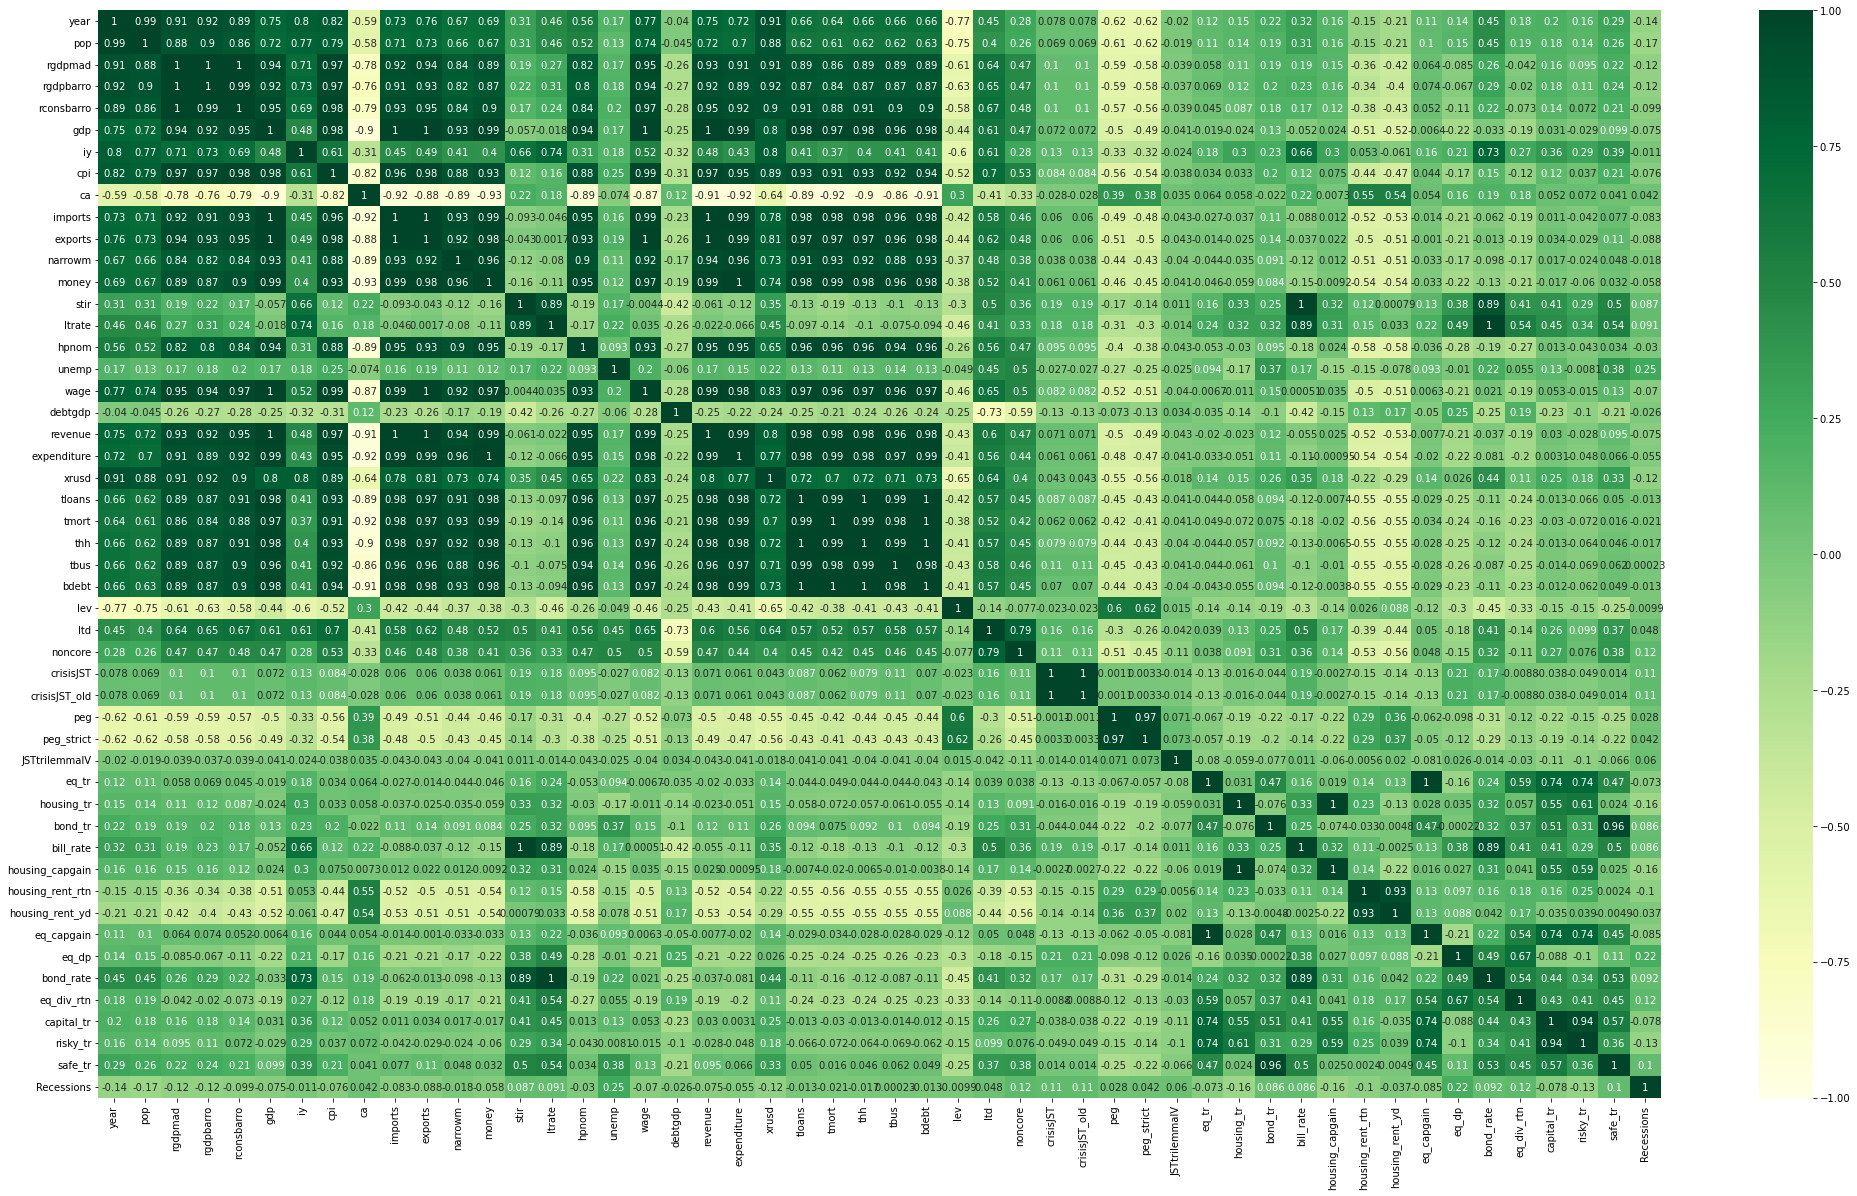

In [109]:
# Plot the heatmap
plt.figure(figsize=(35, 20))
sns.heatmap(pearsoncorr, 
            cmap='YlGn', 
            vmin=-1, vmax=1, 
            annot=True)

In [36]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(Sheet1, x='year', y='Recessions')
fig.update_layout(
        title='year, Recessions bar chart', 
        xaxis={
            "showgrid": True, 
            "rangeslider": {
                "visible": True, 
                "thickness": 0.05
            }
        }, 
        yaxis={
            "showgrid": True
        }, 
        legend={
            "orientation": 'v'
        }, 
        barmode='overlay', 
        paper_bgcolor='#FFFFFF'
    )
fig.show(renderer="iframe")

In [116]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'Sheet1' is your DataFrame containing the data
# Create a scatter plot for the line
line_trace = go.Scatter(x=Sheet1['year'], y=Sheet1['eq_dp'], mode='lines', name='Bonn rate')

# Create a bar plot for the recession periods on the secondary y-axis
bar_trace = go.Bar(x=Sheet1['year'][Sheet1['Recessions'] == 1], y=[1] * len(Sheet1['Recessions'][Sheet1['Recessions'] == 1]), 
                   width=0.5, marker_color='red', name='Recession', yaxis='y2')

# Create the combined figure
fig = go.Figure()

# Add the line trace to the figure
fig.add_trace(line_trace)

# Add the bar trace to the figure
fig.add_trace(bar_trace)

# Update the layout
fig.update_layout(
    title='Equity Rate and Recessions Overlapping Plot',
    xaxis_title='Year',
    yaxis_title='Equity Rate',
    showlegend=True,
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
    yaxis2=dict(
        title='Recession',
        overlaying='y',
        side='right',
        showgrid=False,
        showline=False
    ),
    paper_bgcolor='#FFFFFF'
)

fig.show(renderer="iframe")


In [42]:
pearsoncorr = df_clean.corr()

# Retrieve column names where 'Recessions' has positive values
positive_recessions_columns = pearsoncorr.index[pearsoncorr['Recessions'] > 0].tolist()

print("Columns with positive correlation to 'Recessions':")
print(positive_recessions_columns)

Columns with positive correlation to 'Recessions':
['ca', 'stir', 'ltrate', 'unemp', 'tbus', 'ltd', 'noncore', 'crisisJST', 'crisisJST_old', 'peg', 'peg_strict', 'JSTtrilemmaIV', 'bond_tr', 'bill_rate', 'eq_dp', 'bond_rate', 'eq_div_rtn', 'safe_tr', 'Recessions']


In [54]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming 'Sheet1' is your DataFrame containing the data
# List of columns to plot
columns_to_plot = [ 'unemp', 'bond_tr', 'bill_rate',
                   'eq_dp', 'bond_rate', 'eq_div_rtn', ]

# Create the combined figure with subplots
fig = make_subplots(rows=len(columns_to_plot), cols=1, shared_xaxes=True, vertical_spacing=0.03)

# Loop through columns and add traces to each subplot
for idx, col in enumerate(columns_to_plot, start=1):
    line_trace = go.Scatter(x=Sheet1['year'], y=Sheet1[col], mode='lines', name=col)
    bar_trace = go.Bar(x=Sheet1['year'][Sheet1['Recessions'] == 1], y=[1] * len(Sheet1['Recessions'][Sheet1['Recessions'] == 1]),
                       width=0.5, marker_color='grey', name='Recession', yaxis='y2')

    fig.add_trace(line_trace, row=idx, col=1)
    fig.add_trace(bar_trace, row=idx, col=1)

    # Update layout for each subplot
    fig.update_yaxes(title_text=col, row=idx, col=1)
    fig.update_yaxes(title_text='Recession', secondary_y=True, row=idx, col=1)

fig.update_layout(
    title='Recsession Trends',
    xaxis_title='Year',
    paper_bgcolor='#FFFFFF'
)

fig.show(renderer="iframe")


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [56]:
df_clean.columns

Index(['year', 'pop', 'rgdpmad', 'rgdpbarro', 'rconsbarro', 'gdp', 'iy', 'cpi',
       'ca', 'imports', 'exports', 'narrowm', 'money', 'stir', 'ltrate',
       'hpnom', 'unemp', 'wage', 'debtgdp', 'revenue', 'expenditure', 'xrusd',
       'tloans', 'tmort', 'thh', 'tbus', 'bdebt', 'lev', 'ltd', 'noncore',
       'crisisJST', 'crisisJST_old', 'peg', 'peg_strict', 'JSTtrilemmaIV',
       'eq_tr', 'housing_tr', 'bond_tr', 'bill_rate', 'housing_capgain',
       'housing_rent_rtn', 'housing_rent_yd', 'eq_capgain', 'eq_dp',
       'bond_rate', 'eq_div_rtn', 'capital_tr', 'risky_tr', 'safe_tr',
       'Recessions'],
      dtype='object')

In [58]:
X = df_clean.loc[:, df_clean.columns != 'Recessions']

In [59]:
y = df_clean[["Recessions"]].copy()
y

,Recessions
0,0
1,0
2,0
3,1
4,1
...,...
146,0
147,0
148,0
149,0


In [60]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [61]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# SVC

In [62]:
Classifier = SVC(kernel="linear")

# Training the model on the training data and labels
Classifier.fit(X_train_scaled, y_train)

# Using the model to predict the labels of the test data
y_pred = Classifier.predict(X_test_scaled)

# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

# Printing the results
print("Accuracy for SVM is:",accuracy)
print("Confusion Matrix")
print(confusion_mat)

C:\Users\DEll\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy for SVM is: 86.95652173913044
Confusion Matrix
[[37  2]
 [ 4  3]]


Text(91.68, 0.5, 'Actual label')

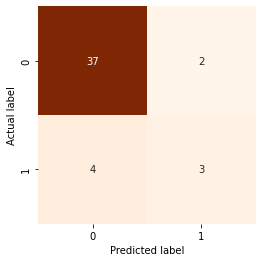

In [63]:
sns.heatmap(confusion_mat, square=True, annot=True, fmt='d', cbar=False, cmap='Oranges')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.7124999999999999
0.751219512195122
0.6886446886446886


# Navie Bayes

In [65]:
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

C:\Users\DEll\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB()

In [66]:
y_pred  =  classifier.predict(X_test_scaled)

In [67]:
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[32,  7],
       [ 4,  3]], dtype=int64)

Text(91.68, 0.5, 'Actual label')

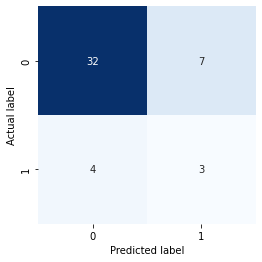

In [68]:
sns.heatmap(confusion_mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [71]:
accuracy_score(y_test,y_pred)

0.7608695652173914

In [72]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.6031372549019607
0.5944444444444444
0.6245421245421245


# KNN neighbour

In [73]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)

C:\Users\DEll\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



KNeighborsClassifier(metric='euclidean')

In [74]:
KNeighborsClassifier(metric='euclidean')

KNeighborsClassifier(metric='euclidean')

In [75]:
y_pred = knn.predict(X_test_scaled)


In [76]:
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[34,  5],
       [ 4,  3]], dtype=int64)

Text(91.68, 0.5, 'Actual label')

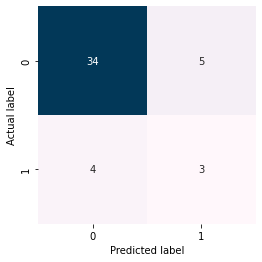

In [77]:
sns.heatmap(confusion_mat, square=True, annot=True, fmt='d', cbar=False, cmap='PuBu')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [78]:
accuracy_score(y_test,y_pred)


0.8043478260869565

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.6415584415584416
0.6348684210526316
0.6501831501831502


# Random Forest

In [80]:
clf=RandomForestClassifier(n_estimators=100)

In [81]:
#Train the model 
clf.fit(X_train_scaled,y_train)

#Prediction
y_pred=clf.predict(X_test_scaled)

C:\Users\DEll\AppData\Local\Temp\ipykernel_13428\3193261915.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [82]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8695652173913043


In [83]:
confusion_mat = confusion_matrix(y_test, y_pred)
confusion_mat

array([[36,  3],
       [ 3,  4]], dtype=int64)

Text(91.68, 0.5, 'Actual label')

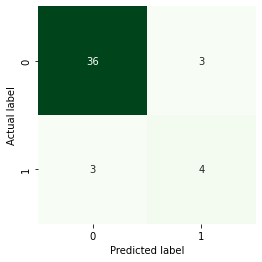

In [84]:
sns.heatmap(confusion_mat, square=True, annot=True, fmt='d', cbar=False, cmap='Greens')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [85]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.7472527472527473
0.7472527472527473
0.7472527472527473


# Decision Tree

In [86]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [87]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_scaled,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)

In [88]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8260869565217391


In [89]:
confusion_mat = confusion_matrix(y_test,y_pred)
confusion_mat

array([[36,  3],
       [ 5,  2]], dtype=int64)

Text(91.68, 0.5, 'Actual label')

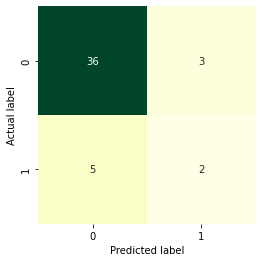

In [90]:
sns.heatmap(confusion_mat, square=True, annot=True, fmt='d', cbar=False, cmap='YlGn')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [91]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.6166666666666667
0.6390243902439025
0.6043956043956045


# Ada Boost

In [92]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_scaled, y_train)

C:\Users\DEll\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



AdaBoostClassifier(n_estimators=100, random_state=0)

In [93]:
AdaBoostClassifier(n_estimators=100, random_state=0)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [94]:
y_pred = clf.predict(X_test_scaled)

In [95]:
accuracy = clf.score(X_train_scaled, y_train)
accuracy

1.0

In [96]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

0.663003663003663
0.663003663003663
0.663003663003663


In [97]:
confusion_mat = confusion_matrix(y_test,y_pred)
confusion_mat

array([[35,  4],
       [ 4,  3]], dtype=int64)

Text(91.68, 0.5, 'Actual label')

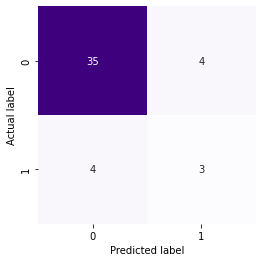

In [98]:
sns.heatmap(confusion_mat, square=True, annot=True, fmt='d', cbar=False, cmap='Purples')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

# LSTM

In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [102]:
timesteps = 1  # Adjust this according to your data characteristics
features = X_train_scaled.shape[1]
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], timesteps, features)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], timesteps, features)

In [103]:
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, features)))
model.add(Dense(1, activation='sigmoid'))


In [104]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [105]:
# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
4/4 [==============================] - 4s 220ms/step - loss: 0.6864 - accuracy: 0.5810 - val_loss: 0.6687 - val_accuracy: 0.5652
Epoch 2/10
4/4 [==============================] - 0s 45ms/step - loss: 0.6528 - accuracy: 0.7333 - val_loss: 0.6418 - val_accuracy: 0.7391
Epoch 3/10
4/4 [==============================] - 0s 26ms/step - loss: 0.6287 - accuracy: 0.7619 - val_loss: 0.6166 - val_accuracy: 0.8043
Epoch 4/10
4/4 [==============================] - 0s 29ms/step - loss: 0.6077 - accuracy: 0.7619 - val_loss: 0.5932 - val_accuracy: 0.8478
Epoch 5/10
4/4 [==============================] - 0s 29ms/step - loss: 0.5882 - accuracy: 0.7524 - val_loss: 0.5728 - val_accuracy: 0.8261
Epoch 6/10
4/4 [==============================] - 0s 17ms/step - loss: 0.5714 - accuracy: 0.7619 - val_loss: 0.5537 - val_accuracy: 0.8261
Epoch 7/10
4/4 [==============================] - 0s 17ms/step - loss: 0.5550 - accuracy: 0.7619 - val_loss: 0.5360 - val_accuracy: 0.8261
Epoch 8/10
4/4 [==========

In [106]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

2/2 [==============================] - 0s 5ms/step - loss: 0.4946 - accuracy: 0.8261
Test Loss: 0.4946
Test Accuracy: 0.8261


2/2 [==============================] - 1s 3ms/step


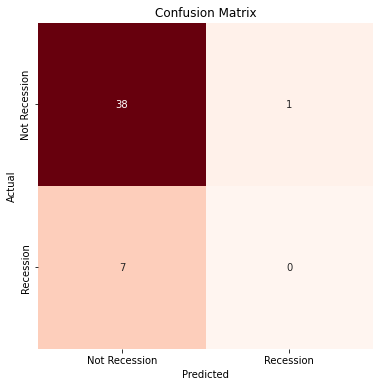

In [108]:
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.round(y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix with red coloring
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=["Not Recession", "Recession"],
            yticklabels=["Not Recession", "Recession"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()